# CREDIT CARD SEGMENTATION- (Unsupervised learning)

In [1]:
import pandas as pd
import numpy as np

In [2]:
credit_cd= pd.read_csv("CC_GENERAL.csv")
credit_cd.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
credit_cd.shape

(8950, 18)

In [4]:
credit_cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
credit_cd.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

<b>Creating New KPI's -Customer's Monthy purchase amount, Monthly Cash advance amount, credit card limit usage and purcahse type

In [6]:
credit_cd['Monthly_avg_purch'] = credit_cd['PURCHASES']/credit_cd['TENURE']
credit_cd['Monthly_cash_advanc'] = credit_cd['CASH_ADVANCE']/credit_cd['TENURE']
credit_cd['limit_usage'] = credit_cd['BALANCE']/credit_cd['CREDIT_LIMIT']
credit_cd['payment_minpay']=credit_cd['PAYMENTS']/credit_cd['MINIMUM_PAYMENTS']

In [7]:
credit_cd[(credit_cd['ONEOFF_PURCHASES']==0) & (credit_cd['INSTALLMENTS_PURCHASES']==0)].shape
credit_cd[(credit_cd['ONEOFF_PURCHASES']>0) & (credit_cd['INSTALLMENTS_PURCHASES']==0)].shape
credit_cd[(credit_cd['ONEOFF_PURCHASES']==0) & (credit_cd['INSTALLMENTS_PURCHASES']>0)].shape
credit_cd[(credit_cd['ONEOFF_PURCHASES']>0) & (credit_cd['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 22)

<b>We can see that there are four types of purchases of Credit Card User-

In [8]:
def purchase_type(credit_cd):   
    if (credit_cd['ONEOFF_PURCHASES']==0) & (credit_cd['INSTALLMENTS_PURCHASES']==0):
        return 'none_purchases'
    if (credit_cd['ONEOFF_PURCHASES']>0) & (credit_cd['INSTALLMENTS_PURCHASES']>0):
         return 'both_purchases'
    if (credit_cd['ONEOFF_PURCHASES']>0) & (credit_cd['INSTALLMENTS_PURCHASES']==0):
        return 'one_of_purchases'
    if (credit_cd['ONEOFF_PURCHASES']==0) & (credit_cd['INSTALLMENTS_PURCHASES']>0):
        return 'istallment_purchases'

In [9]:
credit_cd['purchase_type']=credit_cd.apply(purchase_type,axis=1)

In [10]:
credit_cd['purchase_type'].value_counts()

both_purchases          2774
istallment_purchases    2260
none_purchases          2042
one_of_purchases        1874
Name: purchase_type, dtype: int64

In [11]:
credit_cd.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

           ...           CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
0          ...                 1000.0   201.802084        139.509787   
1          ...                 7000.0  4103.032597       1072.340217   
2          ...                 7500.0   622.066742        627.284787   
3          ...                 7500.0     0.000000               NaN   
4          ...                 1200.0   678.334763        244.791237   

   PRC_FULL_PAYMENT  TENURE  Monthly_avg_purch  Monthly_cash_advanc  \
0          0.000000      12           7.950000             0.000000   
1          0.222222      12           0.000000           536.912124   
2          0.000000      12          64.430833             0.000000   
3          0.000000      12         124.916667            17.149001   
4          0.000000      12           1.333333             0.000000   

   limit_usage  payment_minpay         purchase_type  
0     0.040901        1.446508  istallment_purchases  
1     0.457495        3.826241        none_purchases  
2     0.332687        0.991682      one_of_purchases  
3     0.222223             NaN      one_of_purchases  
4     0.681429        2.771075      one_of_purchases  

[5 rows x 23 columns]

In [12]:
credit_cd.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
Monthly_avg_purch                   float64
Monthly_cash_advanc                 float64
limit_usage                         float64
payment_minpay                      float64
purchase_type                   

In [13]:
#Deleting column CUST_ID as dtype is object and not an importantt variable
credit_cd.drop(['CUST_ID'],axis=1, inplace= True)

<b>Separating numeric and categorical features-

In [14]:
numeric_var_names=[key for key in dict(credit_cd.dtypes) if dict(credit_cd.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(credit_cd.dtypes) if dict(credit_cd.dtypes)[key] in ['object', 'O']]

In [15]:
print(numeric_var_names)
print(cat_var_names)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Monthly_avg_purch', 'Monthly_cash_advanc', 'limit_usage', 'payment_minpay']
['purchase_type']


In [16]:
credit_num=credit_cd[numeric_var_names]
credit_num.head(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY       ...        PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000       ...                    2        1000.0   
1                0.250000       ...                    0        7000.0   
2                0.000000       ...                   12        7500.0   
3                0.083333       ...                    1        7500.0   
4                0.000000       ...                    1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Monthly_avg_purch  \
0   201.802084        139.509787          0.000000      12           7.950000   
1  4103.032597       1072.340217          0.222222      12           0.000000   
2   622.066742        627.284787          0.000000      12          64.430833   
3     0.000000               NaN          0.000000      12         124.916667   
4   678.334763        244.791237          0.000000      12           1.333333   

   Monthly_cash_advanc  limit_usage  payment_minpay  
0             0.000000     0.040901        1.446508  
1           536.912124     0.457495        3.826241  
2             0.000000     0.332687        0.991682  
3            17.149001     0.222223             NaN  
4             0.000000     0.681429        2.771075  

[5 rows x 21 columns]

In [17]:
credit_cat = credit_cd[cat_var_names]
credit_cat.head(5)

purchase_type
0  istallment_purchases
1        none_purchases
2      one_of_purchases
3      one_of_purchases
4      one_of_purchases

<b>Creating Data audit Report

In [18]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [19]:
credit_num.apply(var_summary)

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
N       8.950000e+03        8950.000000  8.950000e+03      8.950000e+03   
NMISS   0.000000e+00           0.000000  0.000000e+00      0.000000e+00   
SUM     1.400205e+07        7851.572994  8.978683e+06      5.302314e+06   
MEAN    1.564475e+03           0.877271  1.003205e+03      5.924374e+02   
MEDIAN  8.733852e+02           1.000000  3.612800e+02      3.800000e+01   
STD     2.081532e+03           0.236904  2.136635e+03      1.659888e+03   
VAR     4.332775e+06           0.056124  4.565208e+06      2.755228e+06   
CV      1.330499e+00           0.270047  2.129809e+00      2.801795e+00   
MIN     0.000000e+00           0.000000  0.000000e+00      0.000000e+00   
P1      6.510059e-02           0.090909  0.000000e+00      0.000000e+00   
P5      8.814518e+00           0.272727  0.000000e+00      0.000000e+00   
P10     2.357553e+01           0.454545  0.000000e+00      0.000000e+00   
P25     1.282819e+02           0.888889  3.963500e+01      0.000000e+00   
P50     8.733852e+02           1.000000  3.612800e+02      3.800000e+01   
P75     2.054140e+03           1.000000  1.110130e+03      5.774050e+02   
P90     4.338564e+03           1.000000  2.542624e+03      1.600099e+03   
P95     5.909112e+03           1.000000  3.998619e+03      2.671094e+03   
P99     9.338805e+03           1.000000  8.977290e+03      6.689898e+03   
MAX     1.904314e+04           1.000000  4.903957e+04      4.076125e+04   

        INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
N                 8.950000e+03  8.950000e+03          8950.000000   
NMISS             0.000000e+00  0.000000e+00             0.000000   
SUM               3.679055e+06  8.760896e+06          4388.637408   
MEAN              4.110676e+02  9.788711e+02             0.490351   
MEDIAN            8.900000e+01  0.000000e+00             0.500000   
STD               9.043381e+02  2.097164e+03             0.401371   
VAR               8.178274e+05  4.398096e+06             0.161098   
CV                2.199974e+00  2.142431e+00             0.818538   
MIN               0.000000e+00  0.000000e+00             0.000000   
P1                0.000000e+00  0.000000e+00             0.000000   
P5                0.000000e+00  0.000000e+00             0.000000   
P10               0.000000e+00  0.000000e+00             0.000000   
P25               0.000000e+00  0.000000e+00             0.083333   
P50               8.900000e+01  0.000000e+00             0.500000   
P75               4.686375e+02  1.113821e+03             0.916667   
P90               1.140070e+03  3.065535e+03             1.000000   
P95               1.750087e+03  4.647169e+03             1.000000   
P99               3.886241e+03  9.588163e+03             1.000000   
MAX               2.250000e+04  4.713721e+04             1.000000   

        ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
N                      8950.000000                       8950.000000   
NMISS                     0.000000                          0.000000   
SUM                    1811.996268                       3261.714207   
MEAN                      0.202458                          0.364437   
MEDIAN                    0.083333                          0.166667   
STD                       0.298336                          0.397448   
VAR                       0.089004                          0.157965   
CV                        1.473572                          1.090579   
MIN                       0.000000                          0.000000   
P1                        0.000000                          0.000000   
P5                        0.000000                          0.000000   
P10                       0.000000                          0.000000   
P25                       0.000000                          0.000000   
P50                       0.083333                          0.166667   
P75                       0.300000                 

In [20]:
num_summary=credit_num.apply(var_summary).T

In [21]:
num_summary.to_csv('num_summary.csv')

In [22]:
num_summary

N  NMISS           SUM         MEAN  \
BALANCE                           8950.0    0.0  1.400205e+07  1564.474828   
BALANCE_FREQUENCY                 8950.0    0.0  7.851573e+03     0.877271   
PURCHASES                         8950.0    0.0  8.978683e+06  1003.204834   
ONEOFF_PURCHASES                  8950.0    0.0  5.302314e+06   592.437371   
INSTALLMENTS_PURCHASES            8950.0    0.0  3.679055e+06   411.067645   
CASH_ADVANCE                      8950.0    0.0  8.760896e+06   978.871112   
PURCHASES_FREQUENCY               8950.0    0.0  4.388637e+03     0.490351   
ONEOFF_PURCHASES_FREQUENCY        8950.0    0.0  1.811996e+03     0.202458   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0    0.0  3.261714e+03     0.364437   
CASH_ADVANCE_FREQUENCY            8950.0    0.0  1.209541e+03     0.135144   
CASH_ADVANCE_TRX                  8950.0    0.0  2.907700e+04     3.248827   
PURCHASES_TRX                     8950.0    0.0  1.316530e+05    14.709832   
CREDIT_LIMIT                      8949.0    1.0  4.022083e+07  4494.449450   
PAYMENTS                          8950.0    0.0  1.551164e+07  1733.143852   
MINIMUM_PAYMENTS                  8637.0  313.0  7.464152e+06   864.206542   
PRC_FULL_PAYMENT                  8950.0    0.0  1.375746e+03     0.153715   
TENURE                            8950.0    0.0  1.030800e+05    11.517318   
Monthly_avg_purch                 8950.0    0.0  7.712678e+05    86.175173   
Monthly_cash_advanc               8950.0    0.0  7.963530e+05    88.977984   
limit_usage                       8949.0    1.0  3.480502e+03     0.388926   
payment_minpay                    8637.0  313.0  8.075656e+04     9.350070   

                                       MEDIAN          STD           VAR  \
BALANCE                            873.385231  2081.531879  4.332775e+06   
BALANCE_FREQUENCY                    1.000000     0.236904  5.612351e-02   
PURCHASES                          361.280000  2136.634782  4.565208e+06   
ONEOFF_PURCHASES                    38.000000  1659.887917  2.755228e+06   
INSTALLMENTS_PURCHASES              89.000000   904.338115  8.178274e+05   
CASH_ADVANCE                         0.000000  2097.163877  4.398096e+06   
PURCHASES_FREQUENCY                  0.500000     0.401371  1.610985e-01   
ONEOFF_PURCHASES_FREQUENCY           0.083333     0.298336  8.900441e-02   
PURCHASES_INSTALLMENTS_FREQUENCY     0.166667     0.397448  1.579647e-01   
CASH_ADVANCE_FREQUENCY               0.000000     0.200121  4.004857e-02   
CASH_ADVANCE_TRX                     0.000000     6.824647  4.657580e+01   
PURCHASES_TRX                        7.000000    24.857649  6.179027e+02   
CREDIT_LIMIT                      3000.000000  3638.815725  1.324098e+07   
PAYMENTS                           856.901546  2895.063757  8.381394e+06   
MINIMUM_PAYMENTS                   312.343947  2372.446607  5.628503e+06   
PRC_FULL_PAYMENT                     0.000000     0.292499  8.555578e-02   
TENURE                              12.000000     1.338331  1.791129e+00   
Monthly_avg_purch                   31.936667   180.508787  3.258342e+04   
Monthly_cash_advanc                  0.000000   193.136115  3.730156e+04   
limit_usage                          0.302870     0.389722  1.518835e-01   
payment_minpay                       2.170495   120.286915  1.446894e+04   

                                         CV        MIN          P1  \
BALANCE                            1.330499   0.000000    0.065101   
BALANCE_FREQUENCY                  0.270047   0.000000    0.090909   
PURCHASES                          2.129809   0.000000    0.000000   
ONEOFF_PURCHASES                   2.801795   0.000000    0.000000   
INSTALLMENTS_PURCHASES             2.199974   0.000000    0.000000   
CASH_ADVANCE                       2.142431   0.000000    0.000000   
PURCHASES_FREQUENCY                0.818538   0.000000    0.000000   
ONEOFF_PURCHASES_FREQUENCY         1.473572   0.000000    0.000000   
PURCHASES_INSTALLME

<b>Outliers Treatment-

In [23]:
#Handling Outliers -
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

credit_num=credit_num.apply(outlier_capping)

In [24]:
credit_num.apply(var_summary).T

N  NMISS           SUM         MEAN  \
BALANCE                           8950.0    0.0  1.299898e+07  1452.399593   
BALANCE_FREQUENCY                 8950.0    0.0  7.905106e+03     0.883252   
PURCHASES                         8950.0    0.0  7.373574e+06   823.863022   
ONEOFF_PURCHASES                  8950.0    0.0  4.009141e+06   447.948730   
INSTALLMENTS_PURCHASES            8950.0    0.0  3.010208e+06   336.336040   
CASH_ADVANCE                      8950.0    0.0  7.313592e+06   817.161146   
PURCHASES_FREQUENCY               8950.0    0.0  4.388637e+03     0.490351   
ONEOFF_PURCHASES_FREQUENCY        8950.0    0.0  1.811996e+03     0.202458   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0    0.0  3.261714e+03     0.364437   
CASH_ADVANCE_FREQUENCY            8950.0    0.0  1.142355e+03     0.127637   
CASH_ADVANCE_TRX                  8950.0    0.0  2.444900e+04     2.731732   
PURCHASES_TRX                     8950.0    0.0  1.135220e+05    12.684022   
CREDIT_LIMIT                      8949.0    1.0  3.907718e+07  4366.653049   
PAYMENTS                          8950.0    0.0  1.324222e+07  1479.577413   
MINIMUM_PAYMENTS                  8637.0  313.0  5.556938e+06   643.387510   
PRC_FULL_PAYMENT                  8950.0    0.0  1.375746e+03     0.153715   
TENURE                            8950.0    0.0  1.036780e+05    11.584134   
Monthly_avg_purch                 8950.0    0.0  6.357268e+05    71.030929   
Monthly_cash_advanc               8950.0    0.0  6.590474e+05    73.636578   
limit_usage                       8949.0    1.0  3.436306e+03     0.383988   
payment_minpay                    8637.0  313.0  4.106676e+04     4.754748   

                                       MEDIAN          STD           VAR  \
BALANCE                            873.385231  1688.929294  2.852482e+06   
BALANCE_FREQUENCY                    1.000000     0.218438  4.771536e-02   
PURCHASES                          361.280000  1099.813081  1.209589e+06   
ONEOFF_PURCHASES                    38.000000   746.133555  5.567153e+05   
INSTALLMENTS_PURCHASES              89.000000   497.830168  2.478349e+05   
CASH_ADVANCE                         0.000000  1349.178282  1.820282e+06   
PURCHASES_FREQUENCY                  0.500000     0.401371  1.610985e-01   
ONEOFF_PURCHASES_FREQUENCY           0.083333     0.298336  8.900441e-02   
PURCHASES_INSTALLMENTS_FREQUENCY     0.166667     0.397448  1.579647e-01   
CASH_ADVANCE_FREQUENCY               0.000000     0.176670  3.121232e-02   
CASH_ADVANCE_TRX                     0.000000     4.292846  1.842853e+01   
PURCHASES_TRX                        7.000000    15.702845  2.465793e+02   
CREDIT_LIMIT                      3000.000000  3207.224787  1.028629e+07   
PAYMENTS                           856.901546  1596.598519  2.549127e+06   
MINIMUM_PAYMENTS                   312.343947   727.837427  5.297473e+05   
PRC_FULL_PAYMENT                     0.000000     0.292499  8.555578e-02   
TENURE                              12.000000     1.097348  1.204173e+00   
Monthly_avg_purch                   31.936667    93.814213  8.801107e+03   
Monthly_cash_advanc                  0.000000   122.708802  1.505745e+04   
limit_usage                          0.302870     0.346579  1.201169e-01   
payment_minpay                       2.170495     5.670343  3.215279e+01   

                                        CV          MIN           P1  \
BALANCE                           1.162854     8.814518     8.814518   
BALANCE_FREQUENCY                 0.247312     0.272727     0.272727   
PURCHASES                         1.334947     0.000000     0.000000   
ONEOFF_PURCHASES                  1.665667     0.000000     0.000000   
INSTALLMENTS_PURCHASES            1.480157     0.000000     0.000000   
CASH_ADVANCE                      1.651055     0.000000     0.000000   
PURCHASES_FREQUENCY               0.818538     0.000000     0.000000   
ONEOFF_PURCHASES_FREQUENCY        1.473572     0.000000     0.000000   
P

<b>Missing Value Treatment()

In [25]:
credit_num.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
Monthly_avg_purch                     0
Monthly_cash_advanc                   0
limit_usage                           1
payment_minpay                      313
dtype: int64

In [26]:
credit_num['CREDIT_LIMIT'].fillna(credit_num['CREDIT_LIMIT'].median(),inplace=True)
credit_num['MINIMUM_PAYMENTS'].fillna(credit_num['MINIMUM_PAYMENTS'].median(),inplace=True)
credit_num['limit_usage'].fillna(credit_num['limit_usage'].median(),inplace=True)
credit_num['payment_minpay'].fillna(credit_num['payment_minpay'].median(),inplace=True)

In [27]:
credit_num.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Monthly_avg_purch                   0
Monthly_cash_advanc                 0
limit_usage                         0
payment_minpay                      0
dtype: int64

In [28]:
#corrm.to_csv('corrm.csv')

<b>Exploring data(Distribution of variables)

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

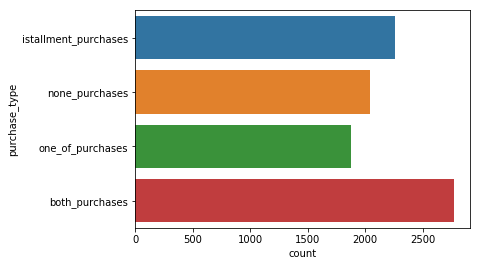

In [29]:
#Customer type of purchase distribution
sns.countplot(y="purchase_type", data=credit_cat)
plt.show()

It seems that maximum purchases done by Customer using both One_off and installment combinedly

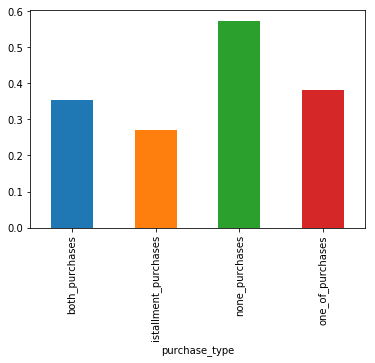

In [30]:
x= credit_cd.groupby(by='purchase_type')['limit_usage'].mean()
x.plot(kind='bar')


It seems that customers who do not do any purchase having good Credit score

C:\Users\Aanchal\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


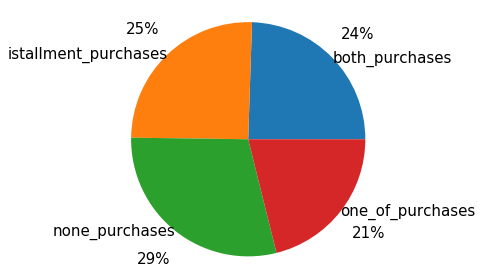

In [31]:
x= credit_cd.groupby(by='purchase_type')['MINIMUM_PAYMENTS'].mean()
x.plot(kind='pie', 
            #labels=[], 
            #colors=['r', 'g', 'b'],
            autopct='%1.0f%%', 
            fontsize=15, 
            subplots=True, legend=False,
           labeldistance= True,
    pctdistance= 1.3,
           )
plt.axes().set_ylabel('')
plt.tight_layout()
plt.axis('equal')
plt.show()


It seems that people who dont do any purchase on an average having high amount of minimum payment due.

<b>Converting categorical feature(purchase_type) into dummies-

In [32]:
col_dummies=pd.get_dummies(credit_cat['purchase_type'])
#l= credit_cat['purchase_type']
#col_dummies=col_dummies.drop(l,axis=1)
col_dummies.head(5)

both_purchases  istallment_purchases  none_purchases  one_of_purchases
0               0                     1               0                 0
1               0                     0               1                 0
2               0                     0               0                 1
3               0                     0               0                 1
4               0                     0               0                 1

<b>Final file for analysis

In [33]:
credit_user = pd.concat([credit_num, col_dummies], axis=1)
credit_user.head(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   4647.169122             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY        ...         PRC_FULL_PAYMENT  TENURE  \
0                0.000000        ...                 0.000000    12.0   
1                0.250000        ...                 0.222222    12.0   
2                0.000000        ...                 0.000000    12.0   
3                0.083333        ...                 0.000000    12.0   
4                0.000000        ...                 0.000000    12.0   

   Monthly_avg_purch  Monthly_cash_advanc  limit_usage  payment_minpay  \
0           7.950000             0.000000     0.040901        1.446508   
1           0.000000           425.548562     0.457495        3.826241   
2          64.430833             0.000000     0.332687        0.991682   
3         124.916667            17.149001     0.222223        2.170495   
4           1.333333             0.000000     0.681429        2.771075   

   both_purchases  istallment_purchases  none_purchases  one_of_purchases  
0               0                     1               0                 0  
1               0                     0               1                 0  
2               0                     0               0                 1  
3               0                     0               0                 1  
4               0                     0               0                 1  

[5 rows x 25 columns]

In [34]:
credit_user.to_csv('credit_user.csv')

In [35]:
credit_user.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              float64
Monthly_avg_purch                   float64
Monthly_cash_advanc                 float64
limit_usage                         float64
payment_minpay                      float64
both_purchases                        uint8
istallment_purchases            

<b>Running Pandas -profiling

In [36]:
import pandas_profiling
pandas_profiling.ProfileReport(credit_user)

In [37]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [38]:
from sklearn.decomposition import PCA

In [39]:
credit_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 25 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT       

In [40]:
credit_user.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8950.000000        8950.000000  8950.000000       8950.000000   
mean   1452.399593           0.883252   823.863022        447.948730   
std    1688.929294           0.218438  1099.813081        746.133555   
min       8.814518           0.272727     0.000000          0.000000   
25%     128.281915           0.888889    39.635000          0.000000   
50%     873.385231           1.000000   361.280000         38.000000   
75%    2054.140036           1.000000  1110.130000        577.405000   
max    5909.111808           1.000000  3998.619500       2671.094000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               336.336040    817.161146             0.490351   
std                497.830168   1349.178282             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max               1750.087500   4647.169122             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY        ...         PRC_FULL_PAYMENT  \
count             8950.000000        ...              8950.000000   
mean                 0.127637        ...                 0.153715   
std                  0.176670        ...                 0.292499   
min                  0.000000        ...                 0.000000   
25%                  0.000000        ...                 0.000000   
50%                  0.000000        ...                 0.000000   
75%                  0.222222        ...                 0.142857   
max                  0.583333        ...                 1.000000   

            TENURE  Monthly_avg_purch  Monthly_cash_advanc  limit_usage  \
count  8950.000000        8950.000000          8950.000000  8950.000000   
mean     11.584134          71.030929            73.636578     0.383979   
std       1.097348          93.814213           122.708802     0.346561   
min       8.000000           0.000000             0.000000     0.002943   
25%      12.000000           3.399375             0.000000     0.041533   
50%      12.000000          31.936667             0.000000     0.302870   
75%      12.000000          97.228333            99.085196     0.717571   
max      12.000000         339.250042           425.548562     0.966694   

       payment_minpay  both_purchases  istallment_purchases  none_purchases  \
count     8950.000000     8950.000000           8950.000000     8950.000000   
mean         4.664371        0.309944              0.252514        0.228156   
std          5.590495        0.462496              0.434479        0.419667   
min          0.454553        0.000000              0.000000        0.000000   
25%          0.974915        0.000000              0.000000        0.000000   
50%          2.170495        0.000000              0.000000        0.000000   
75%          6.027054        1.000000              1.000000        0.000000   
max         21.438240        1.000000              1.000000        1.000000   

       one_of_purchases  
count       8950.000000  
mean           0.209385  
std            0.4068

<b>Checking Correlations between variables

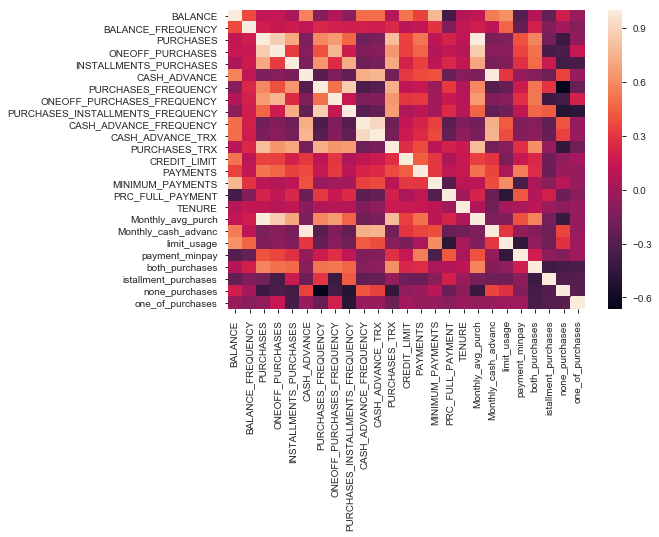

In [41]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(credit_user.corr())

In [42]:
# correlation matrix (ranges from 1 to -1)
corrm=credit_user.corr()

In [43]:
corrm

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.370254   0.124336   
BALANCE_FREQUENCY                 0.370254           1.000000   0.192937   
PURCHASES                         0.124336           0.192937   1.000000   
ONEOFF_PURCHASES                  0.138493           0.153188   0.865282   
INSTALLMENTS_PURCHASES            0.040367           0.170524   0.710001   
CASH_ADVANCE                      0.565401           0.116485  -0.137265   
PURCHASES_FREQUENCY              -0.102891           0.237081   0.589131   
ONEOFF_PURCHASES_FREQUENCY        0.070789           0.204411   0.658719   
PURCHASES_INSTALLMENTS_FREQUENCY -0.089514           0.184918   0.461632   
CASH_ADVANCE_FREQUENCY            0.489843           0.200011  -0.187429   
CASH_ADVANCE_TRX                  0.487851           0.178447  -0.149599   
PURCHASES_TRX                     0.086826           0.240389   0.802715   
CREDIT_LIMIT                      0.510543           0.105576   0.348476   
PAYMENTS                          0.347819           0.124358   0.515077   
MINIMUM_PAYMENTS                  0.774570           0.291212   0.110925   
PRC_FULL_PAYMENT                 -0.359881          -0.111917   0.215231   
TENURE                            0.075801           0.133089   0.121018   
Monthly_avg_purch                 0.118802           0.187511   0.994094   
Monthly_cash_advanc               0.543382           0.103147  -0.143318   
limit_usage                       0.619571           0.456831  -0.113876   
payment_minpay                   -0.291104          -0.222249   0.401123   
both_purchases                    0.077499           0.195141   0.575595   
istallment_purchases             -0.232155          -0.130401  -0.164638   
none_purchases                    0.182315           0.011554  -0.407298   
one_of_purchases                 -0.028233          -0.094483  -0.058367   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.138493                0.040367   
BALANCE_FREQUENCY                         0.153188                0.170524   
PURCHASES                                 0.865282                0.710001   
ONEOFF_PURCHASES                          1.000000                0.319737   
INSTALLMENTS_PURCHASES                    0.319737                1.000000   
CASH_ADVANCE                             -0.092469               -0.147078   
PURCHASES_FREQUENCY                       0.394927                0.639240   
ONEOFF_PURCHASES_FREQUENCY                0.764991                0.251237   
PURCHASES_INSTALLMENTS_FREQUENCY          0.168362                0.729578   
CASH_ADVANCE_FREQUENCY                   -0.121483               -0.200741   
CASH_ADVANCE_TRX                         -0.096036               -0.162689   
PURCHASES_TRX                             0.638903                0.714152   
CREDIT_LIMIT                              0.336708                0.210151   
PAYMENTS                                  0.456999                0.338280   
MINIMUM_PAYMENTS                          0.064326                0.107588   
PRC_FULL_PAYMENT                          0.127898                0.238894   
TENURE                                    0.087760                0.116144   
Monthly_avg_purch                         0.863161                0.702986   
Monthly_cash_advanc                      -0.097293               -0.152415   
limit_usage                              -0.078613               -0.122431   
payment_minpay                            0.354370                0.278015   
both_purchases                            0.501063                0.485354   
istallment_purchases                     -0.348961                0.163791   
none_purchases                           -0.326428               -0.367340   
one_of_purchases                          0.139761               -0.347702   

                             

In [44]:
corrm.to_csv('corrm.csv')

<b>Standardrizing data

To put data on the same scale

In [45]:
#drop some variables which are not numerical (eg: none, one_off,istallment)
credit_user.drop(['none_purchases','one_of_purchases'], axis=1, inplace=True)

In [46]:
credit_user.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              float64
Monthly_avg_purch                   float64
Monthly_cash_advanc                 float64
limit_usage                         float64
payment_minpay                      float64
both_purchases                        uint8
istallment_purchases            

In [47]:
sc=StandardScaler()
credit_scaled=sc.fit_transform(credit_user)

In [48]:
pd.DataFrame(credit_scaled).head(10)

0         1         2         3         4         5         6   \
0 -0.835783 -0.297904 -0.662389 -0.600394 -0.483999 -0.605707 -0.806490   
1  1.036257  0.118296 -0.749136 -0.600394 -0.675642  2.838929 -1.221758   
2  0.617437  0.534496 -0.046095  0.435900 -0.675642 -0.605707  1.269843   
3  0.126875 -1.130304  0.613899  1.408742 -0.675642 -0.453170 -1.014125   
4 -0.375812  0.534496 -0.734587 -0.578948 -0.675642 -0.605707 -1.014125   
5  0.211642  0.534496  0.463211 -0.600394  2.002690 -0.605707  0.439310   
6 -0.488585  0.534496  2.886794  2.979721  0.707196 -0.605707  1.269843   
7  0.219828  0.534496 -0.352501 -0.600394  0.200610 -0.605707  1.269843   
8 -0.259038  0.534496  0.034214  0.286213 -0.273876 -0.605707 -0.391225   
9 -0.769864 -1.546504  0.416219  1.117357 -0.675642 -0.605707 -0.806490   

         7         8         9     ...           13        14        15  \
0 -0.678661 -0.707313 -0.722502    ...    -0.800356 -0.686097 -0.525551   
1 -0.678661 -0.916995  0.692644    ...     1.643245  0.613947  0.234227   
2  2.673451 -0.916995 -0.722502    ...    -0.537116 -0.006307 -0.525551   
3 -0.399319 -0.916995 -0.250789    ...    -0.870392 -0.445226 -0.525551   
4 -0.399319 -0.916995 -0.722502    ...    -0.501872 -0.539371 -0.525551   
5 -0.678661  0.550784 -0.722502    ...    -0.049808  2.474345 -0.525551   
6  2.673451  1.599199 -0.722502    ...     2.882860 -0.604490  2.893453   
7 -0.678661  1.599199 -0.722502    ...    -0.501414 -0.139054 -0.525551   
8 -0.399319 -0.287947 -0.722502    ...    -0.495643 -0.445756 -0.525551   
9 -0.119974 -0.916995 -0.722502    ...    -0.197184 -0.740739 -0.525551   

         16        17        18        19        20        21        22  
0  0.378995 -0.672440 -0.600126 -0.990006 -0.575627 -0.670193  1.720516  
1  0.378995 -0.757187  2.868023  0.212144 -0.149929 -0.670193 -0.581221  
2  0.378995 -0.070357 -0.600126 -0.148012 -0.656989 -0.670193 -0.581221  
3  0.378995  0.574420 -0.460364 -0.466773 -0.446117 -0.670193 -0.581221  
4  0.378995 -0.742974 -0.600126  0.858340 -0.338682 -0.670193 -0.581221  
5  0.378995  0.427206 -0.600126  1.681518 -0.730346 -0.670193  1.720516  
6  0.378995  2.859205 -0.600126 -0.973953  3.000594  1.492109 -0.581221  
7  0.378995 -0.369697 -0.600126  1.179986 -0.606065 -0.670193  1.720516  
8  0.378995  0.008101 -0.600126 -0.689641 -0.439716  1.492109 -0.581221  
9  0.378995  0.381297 -0.600126 -1.068098  1.242935 -0.670193 -0.581221  

[10 rows x 23 columns]

In [49]:
pd.DataFrame(credit_scaled).describe()

0             1             2             3             4   \
count  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03   
mean   1.585820e-16 -6.460754e-15  5.124641e-15  1.072175e-14 -4.120131e-15   
std    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00   
min   -8.547816e-01 -2.795108e+00 -7.491355e-01 -6.003935e-01 -6.756417e-01   
25%   -7.840421e-01  2.580728e-02 -7.130956e-01 -6.003935e-01 -6.756417e-01   
50%   -3.428484e-01  5.344962e-01 -4.206250e-01 -5.494615e-01 -4.968559e-01   
75%    3.563051e-01  5.344962e-01  2.603015e-01  1.735125e-01  2.657711e-01   
max    2.638927e+00  5.344962e-01  2.886794e+00  2.979721e+00  2.839985e+00   

                 5             6             7             8             9   \
count  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03   
mean   1.343209e-15 -3.716084e-16  2.021052e-15  2.353921e-16  9.352668e-16   
std    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00   
min   -6.057071e-01 -1.221758e+00 -6.786608e-01 -9.169952e-01 -7.225024e-01   
25%   -6.057071e-01 -1.014125e+00 -6.786608e-01 -9.169952e-01 -7.225024e-01   
50%   -6.057071e-01  2.404259e-02 -3.993193e-01 -4.976286e-01 -7.225024e-01   
75%    2.198943e-01  1.062211e+00  3.269728e-01  9.701506e-01  5.354039e-01   
max    2.838929e+00  1.269843e+00  2.673451e+00  1.599199e+00  2.579503e+00   

           ...                 13            14            15            16  \
count      ...       8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03   
mean       ...       2.836961e-16 -9.883466e-16 -2.201566e-15  2.564970e-14   
std        ...       1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00   
min        ...      -8.703917e-01 -7.783957e-01 -5.255510e-01 -3.266360e+00   
25%        ...      -6.866864e-01 -6.424089e-01 -5.255510e-01  3.789947e-01   
50%        ...      -3.900233e-01 -4.452258e-01 -5.255510e-01  3.789947e-01   
75%        ...       2.640491e-01  2.186690e-01 -3.712234e-02  3.789947e-01   
max        ...       2.882860e+00  2.975109e+00  2.893453e+00  3.789947e-01   

                 17            18            19            20            21  \
count  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03   
mean  -3.022412e-15 -1.857800e-15  2.204289e-16 -4.715533e-16 -3.752852e-15   
std    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00   
min   -7.571870e-01 -6.001256e-01 -1.099540e+00 -7.530735e-01 -6.701925e-01   
25%   -7.209497e-01 -6.001256e-01 -9.881829e-01 -6.599884e-01 -6.701925e-01   
50%   -4.167433e-01 -6.001256e-01 -2.340532e-01 -4.461170e-01 -6.701925e-01   
75%    2.792633e-01  2.074019e-01  9.626350e-01  2.437636e-01  1.492109e+00   
max    2.859205e+00  2.868023e+00  1.681518e+00  3.000594e+00  1.492109e+00   

                 22  
count  8.950000e+03  
mean   8.733374e-15  
std    1.000056e+00  
min   -5.812208e-01  
25%   -5.812208e-01  
50%   -5.812208e-01  
75%    1.720516e+00  
max    1.720516e+00  

[8 rows x 23 columns]

<b>Applyting PCA

In [50]:
pc = PCA(n_components=23)

In [51]:
pc.fit(credit_scaled)

PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
pc.explained_variance_

array([6.82554123e+00, 5.11474198e+00, 2.26297739e+00, 1.86633075e+00,
       1.21311723e+00, 9.31550630e-01, 8.56231414e-01, 7.69642860e-01,
       6.01312654e-01, 5.23901495e-01, 4.60948490e-01, 3.55646858e-01,
       2.66143717e-01, 2.25051694e-01, 1.78464815e-01, 1.59909758e-01,
       1.27690898e-01, 1.06219150e-01, 7.66254954e-02, 4.37484837e-02,
       2.63031468e-02, 7.03124332e-03, 3.43873651e-03])

In [53]:
#Eigen values
sum(pc.explained_variance_)

23.00257011956642

In [54]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

In [55]:
var

array([2.96729505e-01, 2.22355239e-01, 9.83793279e-02, 8.11357486e-02,
       5.27383341e-02, 4.04976759e-02, 3.72232933e-02, 3.34589942e-02,
       2.61411073e-02, 2.27757808e-02, 2.00389995e-02, 1.54611792e-02,
       1.15701731e-02, 9.78376300e-03, 7.75847281e-03, 6.95182135e-03,
       5.55115786e-03, 4.61770793e-03, 3.33117104e-03, 1.90189546e-03,
       1.14348730e-03, 3.05672074e-04, 1.49493578e-04])

In [56]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [57]:
var1

array([ 29.67,  51.91,  61.75,  69.86,  75.13,  79.18,  82.9 ,  86.25,
        88.86,  91.14,  93.14,  94.69,  95.85,  96.83,  97.61,  98.31,
        98.87,  99.33,  99.66,  99.85,  99.96,  99.99, 100.  ])

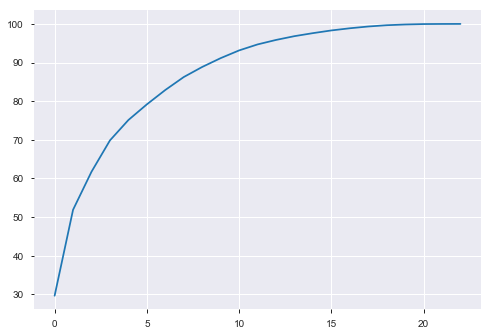

In [58]:
pd.Series(var1).plot()

number of components have choosen as 6 based on cumulative variacne is explaining close to 80 % and individual component explaining >0.93 variance

In [59]:
pc_final=PCA(n_components=6).fit(credit_scaled)

In [60]:
pc_final.explained_variance_

array([6.82554123, 5.11474198, 2.26297739, 1.86633075, 1.21311723,
       0.93155063])

In [61]:
reduced_cr=pc_final.fit_transform(credit_scaled)

In [62]:
dimensions = pd.DataFrame(reduced_cr)

In [63]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5","C6"]

In [64]:
dimensions.head()

C1        C2        C3        C4        C5        C6
0 -1.670232 -2.697983 -0.351540  0.069173 -0.518994  0.026763
1 -2.726649  3.169869  1.554917  1.248025 -1.149658 -0.144508
2  0.829068 -0.044059 -0.272035 -2.199343 -0.487173  0.503994
3 -0.377559 -0.510002  1.102645 -1.670770 -1.047789  1.214809
4 -1.895116 -1.341256 -0.417237 -1.670552 -0.194461 -0.638204

<b>Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [65]:
#pc_final.components_

#print pd.DataFrame(pc_final.components_,columns=telco_num.columns).T

Loading1=  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=credit_user.columns).T

In [66]:
Loading1.to_csv("Loading1.csv")

<b>Clustering

In [67]:
#selected the list variables from PCA based on factor loading matrics
list_var = ['BALANCE','INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','TENURE','Monthly_avg_purch','Monthly_cash_advanc','limit_usage','payment_minpay','ONEOFF_PURCHASES']

In [69]:
credit_scaled1=pd.DataFrame(credit_scaled, columns=credit_user.columns)
credit_scaled1.head(5)

credit_scaled2=credit_scaled1[list_var]
credit_scaled2.head(10)

BALANCE  INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  \
0 -0.835783               -0.483999            -0.806490   
1  1.036257               -0.675642            -1.221758   
2  0.617437               -0.675642             1.269843   
3  0.126875               -0.675642            -1.014125   
4 -0.375812               -0.675642            -1.014125   
5  0.211642                2.002690             0.439310   
6 -0.488585                0.707196             1.269843   
7  0.219828                0.200610             1.269843   
8 -0.259038               -0.273876            -0.391225   
9 -0.769864               -0.675642            -0.806490   

   PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0                         -0.707313      -0.680426     -1.049768 -0.800356   
1                         -0.916995      -0.807798      0.821198  1.643245   
2                         -0.916995      -0.043563      0.977112 -0.537116   
3                         -0.916995      -0.744112      0.977112 -0.870392   
4                         -0.916995      -0.744112     -0.987403 -0.501872   
5                          0.550784      -0.298308     -0.800306 -0.049808   
6                          1.599199       2.822320      2.380337  2.882860   
7                          1.599199      -0.043563     -0.644392 -0.501414   
8                         -0.287947      -0.489367      0.821198 -0.495643   
9                         -0.916995      -0.616739      2.068509 -0.197184   

   MINIMUM_PAYMENTS    TENURE  Monthly_avg_purch  Monthly_cash_advanc  \
0         -0.686097  0.378995          -0.672440            -0.600126   
1          0.613947  0.378995          -0.757187             2.868023   
2         -0.006307  0.378995          -0.070357            -0.600126   
3         -0.445226  0.378995           0.574420            -0.460364   
4         -0.539371  0.378995          -0.742974            -0.600126   
5          2.474345  0.378995           0.427206            -0.600126   
6         -0.604490  0.378995           2.859205            -0.600126   
7         -0.139054  0.378995          -0.369697            -0.600126   
8         -0.445756  0.378995           0.008101            -0.600126   
9         -0.740739  0.378995           0.381297            -0.600126   

   limit_usage  payment_minpay  ONEOFF_PURCHASES  
0    -0.990006       -0.575627         -0.600394  
1     0.212144       -0.149929         -0.600394  
2    -0.148012       -0.656989          0.435900  
3    -0.466773       -0.446117          1.408742  
4     0.858340       -0.338682         -0.578948  
5     1.681518       -0.730346         -0.600394  
6    -0.973953        3.000594          2.979721  
7     1.179986       -0.606065         -0.600394  
8    -0.689641       -0.439716          0.286213  
9    -1.068098        1.242935          1.117357

<b>Segmentation

In [70]:
km_3=KMeans(n_clusters=3,random_state=123)

In [71]:
km_3.fit(credit_scaled2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [72]:
km_3.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [73]:
km_3.cluster_centers_

array([[-0.63672023, -0.14353352,  0.17573829,  0.14046617, -0.17229142,
        -0.28540043, -0.43043667, -0.54021879, -0.06054089, -0.26017328,
        -0.45587727, -0.62794691,  0.03118176, -0.24957686],
       [ 0.6662564 , -0.53528733, -0.75820758, -0.66464693, -0.58948242,
         0.00642682,  0.0382895 ,  0.55826552, -0.05537098, -0.54311859,
         0.67849962,  0.88912997, -0.41495929, -0.39121364],
       [ 0.33994405,  1.45668404,  1.06242673,  0.96720226,  1.64173   ,
         0.74067688,  1.05950515,  0.30254096,  0.27133812,  1.78044425,
        -0.16223078, -0.13192616,  0.75308623,  1.44663875]])

In [74]:
km_4=KMeans(n_clusters=4,random_state=123).fit(credit_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(credit_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(credit_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(credit_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(credit_scaled2)
#km_5.labels_

In [75]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([credit_user,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
credit_user['cluster_3'] = km_3.labels_
credit_user['cluster_4'] = km_4.labels_
credit_user['cluster_5'] = km_5.labels_
credit_user['cluster_6'] = km_6.labels_
credit_user['cluster_7'] = km_7.labels_
credit_user['cluster_8'] = km_8.labels_

In [76]:
credit_user.head(10)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182    95.4000             0.000   
1  3202.467416           0.909091     0.0000             0.000   
2  2495.148862           1.000000   773.1700           773.170   
3  1666.670542           0.636364  1499.0000          1499.000   
4   817.714335           1.000000    16.0000            16.000   
5  1809.828751           1.000000  1333.2800             0.000   
6   627.260806           1.000000  3998.6195          2671.094   
7  1823.652743           1.000000   436.2000             0.000   
8  1014.926473           1.000000   861.4900           661.490   
9   152.225975           0.545455  1281.6000          1281.600   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   4647.169122             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY    ...      limit_usage  payment_minpay  \
0                0.000000    ...         0.040901        1.446508   
1                0.250000    ...         0.457495        3.826241   
2                0.000000    ...         0.332687        0.991682   
3                0.083333    ...         0.222223        2.170495   
4                0.000000    ...         0.681429        2.771075   
5                0.000000    ...         0.966694        0.581601   
6                0.000000    ...         0.046464       21.438240   
7                0.000000    ...         0.792892        1.276357   
8                0.000000    ...         0.144989        2.206280   
9                0.000000    ...         0.013839       11.612605   

   both_purchases  istallment_purchases  cluster_3  cluster_4  cluster_5  \
0               0                     1          0          3          0   
1               0                     0          1          1          1   
2               0                     0          0          0          0   
3               0                     0          0          3          0   
4               0                     0          1          3          0   
5               0                     1          1          0          2   
6               1                     0          2          2          3   
7               0                     1          0          0          2   
8               1                     0          0          3          0   
9               0                     0          0          3          0   

   cluster_6  cluster_7  cluster_8  
0          1          4          4  
1          4          0          3  
2          1          4          4  
3          1          4          4  
4          3          6          7  
5          5      

In [77]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

0    0.467263
1    0.356089
2    0.176648
dtype: float64

In [78]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

3    0.412402
0    0.301117
1    0.154413
2    0.132067
dtype: float64

In [79]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

0    0.381676
2    0.268156
1    0.139553
3    0.127039
4    0.083575
dtype: float64

<b>
Choosing number clusters using Silhouette Coefficient

In [80]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(credit_scaled2, km_8.labels_)

0.21086553322716403

In [81]:
# calculate SC for K=3 through K=12
k_range = range(3, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(credit_scaled2)
    scores.append(metrics.silhouette_score(credit_scaled2, km.labels_))

In [82]:

scores

[0.20299561627124954,
 0.21036271294892417,
 0.22485440222375996,
 0.20097206044054636,
 0.20834284533450018,
 0.21086553322716403,
 0.21405738353848208]

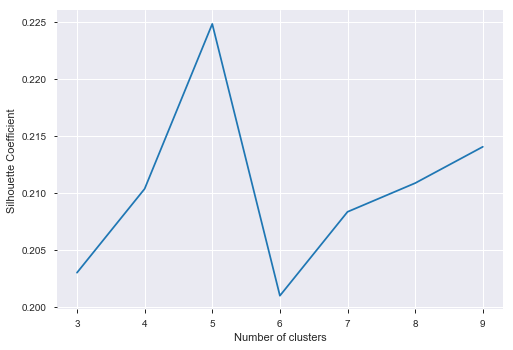

In [83]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

<b>Note:

The solution can be 5 based on the SC score. If we take highest SC score, 5 segment solution is best

<b>Segment Distribution

In [84]:
credit_user.cluster_5.value_counts()/sum(credit_user.cluster_4.value_counts())

0    0.381676
2    0.268156
1    0.139553
3    0.127039
4    0.083575
Name: cluster_5, dtype: float64

<b>Profiling

In [85]:
credit_user.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   4647.169122             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY    ...      limit_usage  payment_minpay  \
0                0.000000    ...         0.040901        1.446508   
1                0.250000    ...         0.457495        3.826241   
2                0.000000    ...         0.332687        0.991682   
3                0.083333    ...         0.222223        2.170495   
4                0.000000    ...         0.681429        2.771075   

   both_purchases  istallment_purchases  cluster_3  cluster_4  cluster_5  \
0               0                     1          0          3          0   
1               0                     0          1          1          1   
2               0                     0          0          0          0   
3               0                     0          0          3          0   
4               0                     0          1          3          0   

   cluster_6  cluster_7  cluster_8  
0          1          4          4  
1          4          0          3  
2          1          4          4  
3          1          4          4  
4          3          6          7  

[5 rows x 29 columns]

In [86]:
credit_user.cluster_3.value_counts()/1000

0    4.182
1    3.187
2    1.581
Name: cluster_3, dtype: float64

In [87]:
credit_user.cluster_3.value_counts()*100/sum(credit_user.cluster_3.value_counts())

0    46.726257
1    35.608939
2    17.664804
Name: cluster_3, dtype: float64

In [88]:
pd.Series.sort_index(credit_user.cluster_5.value_counts())

0    3416
1    1249
2    2400
3    1137
4     748
Name: cluster_5, dtype: int64

In [89]:
credit_user.cluster_3.size

8950

In [90]:
size=pd.concat([pd.Series(credit_user.cluster_3.size), pd.Series.sort_index(credit_user.cluster_3.value_counts()), pd.Series.sort_index(credit_user.cluster_4.value_counts()),
           pd.Series.sort_index(credit_user.cluster_5.value_counts()), pd.Series.sort_index(credit_user.cluster_6.value_counts()),
           pd.Series.sort_index(credit_user.cluster_7.value_counts()), pd.Series.sort_index(credit_user.cluster_8.value_counts())])

In [91]:
size

0    8950
0    4182
1    3187
2    1581
0    2695
1    1382
2    1182
3    3691
0    3416
1    1249
2    2400
3    1137
4     748
0     727
1    2237
2    1097
3    1822
4    1066
5    2001
0    1001
1     593
2    1915
3     747
4    2183
5     718
6    1793
0    1878
1     525
2     580
3     910
4    1939
5     707
6     685
7    1726
dtype: int64

In [92]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/credit_user.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

0     0     1     2     0     1     2     3     0     1  ...   \
Seg_size  8950  4182  3187  1581  2695  1382  1182  3691  3416  1249  ...    

            5     6     0    1    2    3     4    5    6     7  
Seg_size  718  1793  1878  525  580  910  1939  707  685  1726  

[1 rows x 34 columns]

In [93]:
Seg_Pct.T

0         0         1         2         0         1         2  \
Seg_Pct  1.0  0.467263  0.356089  0.176648  0.301117  0.154413  0.132067   

                3         0         1    ...            5         6         0  \
Seg_Pct  0.412402  0.381676  0.139553    ...     0.080223  0.200335  0.209832   

                1         2         3         4         5         6         7  
Seg_Pct  0.058659  0.064804  0.101676  0.216648  0.078994  0.076536  0.192849  

[1 rows x 34 columns]

In [94]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

0            0            1            2            0  \
Seg_size  8950.0  4182.000000  3187.000000  1581.000000  2695.000000   
Seg_Pct      1.0     0.467263     0.356089     0.176648     0.301117   

                    1            2            3            0            1  \
Seg_size  1382.000000  1182.000000  3691.000000  3416.000000  1249.000000   
Seg_Pct      0.154413     0.132067     0.412402     0.381676     0.139553   

             ...                5            6            0           1  \
Seg_size     ...       718.000000  1793.000000  1878.000000  525.000000   
Seg_Pct      ...         0.080223     0.200335     0.209832    0.058659   

                   2           3            4           5           6  \
Seg_size  580.000000  910.000000  1939.000000  707.000000  685.000000   
Seg_Pct     0.064804    0.101676     0.216648    0.078994    0.076536   

                    7  
Seg_size  1726.000000  
Seg_Pct      0.192849  

[2 rows x 34 columns]

In [95]:
credit_user.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   4647.169122             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY    ...      limit_usage  payment_minpay  \
0                0.000000    ...         0.040901        1.446508   
1                0.250000    ...         0.457495        3.826241   
2                0.000000    ...         0.332687        0.991682   
3                0.083333    ...         0.222223        2.170495   
4                0.000000    ...         0.681429        2.771075   

   both_purchases  istallment_purchases  cluster_3  cluster_4  cluster_5  \
0               0                     1          0          3          0   
1               0                     0          1          1          1   
2               0                     0          0          0          0   
3               0                     0          0          3          0   
4               0                     0          1          3          0   

   cluster_6  cluster_7  cluster_8  
0          1          4          4  
1          4          0          3  
2          1          4          4  
3          1          4          4  
4          3          6          7  

[5 rows x 29 columns]

In [96]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([credit_user.apply(lambda x: x.mean()).T, credit_user.groupby('cluster_3').apply(lambda x: x.mean()).T, credit_user.groupby('cluster_4').apply(lambda x: x.mean()).T,
         credit_user.groupby('cluster_5').apply(lambda x: x.mean()).T, credit_user.groupby('cluster_6').apply(lambda x: x.mean()).T,
          credit_user.groupby('cluster_7').apply(lambda x: x.mean()).T, credit_user.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [97]:
Profling_output

0            0            1  \
BALANCE                           1452.399593   377.555689  2577.596674   
BALANCE_FREQUENCY                    0.883252     0.793362     0.959458   
PURCHASES                          823.863022   527.769319   226.203213   
ONEOFF_PURCHASES                   447.948730   262.338166   156.067411   
INSTALLMENTS_PURCHASES             336.336040   264.908129    69.868746   
CASH_ADVANCE                       817.161146   191.936230  1735.735431   
PURCHASES_FREQUENCY                  0.490351     0.561073     0.186045   
ONEOFF_PURCHASES_FREQUENCY           0.202458     0.158627     0.089934   
PURCHASES_INSTALLMENTS_FREQUENCY     0.364437     0.420400     0.100290   
CASH_ADVANCE_FREQUENCY               0.127637     0.047674     0.252797   
CASH_ADVANCE_TRX                     2.731732     0.885940     5.528397   
PURCHASES_TRX                       12.684022     9.987327     3.427989   
CREDIT_LIMIT                      4366.500350  3451.416810  4387.110515   
PAYMENTS                          1479.577413   792.488655  1540.706952   
MINIMUM_PAYMENTS                   631.810232   244.239079  1032.386774   
PRC_FULL_PAYMENT                     0.153715     0.216972     0.021037   
TENURE                              11.584134    11.517934    11.523376   
Monthly_avg_purch                   71.030929    46.674708    20.081533   
Monthly_cash_advanc                 73.636578    17.707196   156.889803   
limit_usage                          0.383979     0.166467     0.692099   
payment_minpay                       4.664371     4.837855     2.344673   
both_purchases                       0.309944     0.263989     0.117666   
istallment_purchases                 0.252514     0.413199     0.113900   
cluster_3                            0.709385     0.000000     1.000000   
cluster_4                            1.655754     1.382114     2.075933   
cluster_5                            1.391285     1.363223     0.783182   
cluster_6                            2.700112     2.453132     2.981801   
cluster_7                            3.323352     3.420134     3.804205   
cluster_8                            3.564022     2.646102     5.063382   

                                            2            0            1  \
BALANCE                           2027.348427   576.725003  4139.666903   
BALANCE_FREQUENCY                    0.967409     0.907706     0.964911   
PURCHASES                         2811.848903   803.973974   394.778551   
ONEOFF_PURCHASES                  1527.296698   266.600497   246.697061   
INSTALLMENTS_PURCHASES            1062.422562   526.275035   138.655816   
CASH_ADVANCE                       619.308110   168.528069  2904.865786   
PURCHASES_FREQUENCY                  0.916701     0.860120     0.267740   
ONEOFF_PURCHASES_FREQUENCY           0.545224     0.189935     0.120752   
PURCHASES_INSTALLMENTS_FREQUENCY     0.748879     0.728352     0.161099   
CASH_ADVANCE_FREQUENCY               0.086855     0.042202     0.329873   
CASH_ADVANCE_TRX                     1.976597     0.808534     7.792330   
PURCHASES_TRX                       38.475648    17.161039     5.606368   
CREDIT_LIMIT                      6745.497671  3481.191526  7137.485199   
PAYMENTS                          3173.812295   899.170227  2537.193137   
MINIMUM_PAYMENTS                   849.511131   391.685399  1582.660916   
PRC_FULL_PAYMENT                     0.253842     0.258796     0.026786   
TENURE                              11.881720    11.578108    11.554993   
Monthly_avg_purch                  238.161508    70.151726    34.725986   
Monthly_cash_advanc                 53.755901    15.420014   258.798419   
limit_usage                          0.338219     0.241611     0.666099   
payment_minpay                       8.881555     4.449226     2.754192   
both_purchases                       0.819102     0.416698     0.189580   
istallment_purchases                 0.106894     0.538033     0.133

In [98]:
Profling_output_file=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [99]:
Profling_output_file

0            0            1  \
Seg_size                          8950.000000  4182.000000  3187.000000   
Seg_Pct                              1.000000     0.467263     0.356089   
BALANCE                           1452.399593   377.555689  2577.596674   
BALANCE_FREQUENCY                    0.883252     0.793362     0.959458   
PURCHASES                          823.863022   527.769319   226.203213   
ONEOFF_PURCHASES                   447.948730   262.338166   156.067411   
INSTALLMENTS_PURCHASES             336.336040   264.908129    69.868746   
CASH_ADVANCE                       817.161146   191.936230  1735.735431   
PURCHASES_FREQUENCY                  0.490351     0.561073     0.186045   
ONEOFF_PURCHASES_FREQUENCY           0.202458     0.158627     0.089934   
PURCHASES_INSTALLMENTS_FREQUENCY     0.364437     0.420400     0.100290   
CASH_ADVANCE_FREQUENCY               0.127637     0.047674     0.252797   
CASH_ADVANCE_TRX                     2.731732     0.885940     5.528397   
PURCHASES_TRX                       12.684022     9.987327     3.427989   
CREDIT_LIMIT                      4366.500350  3451.416810  4387.110515   
PAYMENTS                          1479.577413   792.488655  1540.706952   
MINIMUM_PAYMENTS                   631.810232   244.239079  1032.386774   
PRC_FULL_PAYMENT                     0.153715     0.216972     0.021037   
TENURE                              11.584134    11.517934    11.523376   
Monthly_avg_purch                   71.030929    46.674708    20.081533   
Monthly_cash_advanc                 73.636578    17.707196   156.889803   
limit_usage                          0.383979     0.166467     0.692099   
payment_minpay                       4.664371     4.837855     2.344673   
both_purchases                       0.309944     0.263989     0.117666   
istallment_purchases                 0.252514     0.413199     0.113900   
cluster_3                            0.709385     0.000000     1.000000   
cluster_4                            1.655754     1.382114     2.075933   
cluster_5                            1.391285     1.363223     0.783182   
cluster_6                            2.700112     2.453132     2.981801   
cluster_7                            3.323352     3.420134     3.804205   
cluster_8                            3.564022     2.646102     5.063382   

                                            2            0            1  \
Seg_size                          1581.000000  2695.000000  1382.000000   
Seg_Pct                              0.176648     0.301117     0.154413   
BALANCE                           2027.348427   576.725003  4139.666903   
BALANCE_FREQUENCY                    0.967409     0.907706     0.964911   
PURCHASES                         2811.848903   803.973974   394.778551   
ONEOFF_PURCHASES                  1527.296698   266.600497   246.697061   
INSTALLMENTS_PURCHASES            1062.422562   526.275035   138.655816   
CASH_ADVANCE                       619.308110   168.528069  2904.865786   
PURCHASES_FREQUENCY                  0.916701     0.860120     0.267740   
ONEOFF_PURCHASES_FREQUENCY           0.545224     0.189935     0.120752   
PURCHASES_INSTALLMENTS_FREQUENCY     0.748879     0.728352     0.161099   
CASH_ADVANCE_FREQUENCY               0.086855     0.042202     0.329873   
CASH_ADVANCE_TRX                     1.976597     0.808534     7.792330   
PURCHASES_TRX                       38.475648    17.161039     5.606368   
CREDIT_LIMIT                      6745.497671  3481.191526  7137.485199   
PAYMENTS                          3173.812295   899.170227  2537.193137   
MINIMUM_PAYMENTS                   849.511131   391.685399  1582.660916   
PRC_FULL_PAYMENT                     0.253842     0.258796     0.026786   
TENURE                              11.881720    11.578108    11.554993   
Monthly_avg_purch                  238.161508    70.151726    34.725986   
Monthly_cash_advanc                 53.755901    15.420014   258.798

In [100]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_file.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [101]:
Profling_output_file

Overall        KM3_1        KM3_2  \
Seg_size                          8950.000000  4182.000000  3187.000000   
Seg_Pct                              1.000000     0.467263     0.356089   
BALANCE                           1452.399593   377.555689  2577.596674   
BALANCE_FREQUENCY                    0.883252     0.793362     0.959458   
PURCHASES                          823.863022   527.769319   226.203213   
ONEOFF_PURCHASES                   447.948730   262.338166   156.067411   
INSTALLMENTS_PURCHASES             336.336040   264.908129    69.868746   
CASH_ADVANCE                       817.161146   191.936230  1735.735431   
PURCHASES_FREQUENCY                  0.490351     0.561073     0.186045   
ONEOFF_PURCHASES_FREQUENCY           0.202458     0.158627     0.089934   
PURCHASES_INSTALLMENTS_FREQUENCY     0.364437     0.420400     0.100290   
CASH_ADVANCE_FREQUENCY               0.127637     0.047674     0.252797   
CASH_ADVANCE_TRX                     2.731732     0.885940     5.528397   
PURCHASES_TRX                       12.684022     9.987327     3.427989   
CREDIT_LIMIT                      4366.500350  3451.416810  4387.110515   
PAYMENTS                          1479.577413   792.488655  1540.706952   
MINIMUM_PAYMENTS                   631.810232   244.239079  1032.386774   
PRC_FULL_PAYMENT                     0.153715     0.216972     0.021037   
TENURE                              11.584134    11.517934    11.523376   
Monthly_avg_purch                   71.030929    46.674708    20.081533   
Monthly_cash_advanc                 73.636578    17.707196   156.889803   
limit_usage                          0.383979     0.166467     0.692099   
payment_minpay                       4.664371     4.837855     2.344673   
both_purchases                       0.309944     0.263989     0.117666   
istallment_purchases                 0.252514     0.413199     0.113900   
cluster_3                            0.709385     0.000000     1.000000   
cluster_4                            1.655754     1.382114     2.075933   
cluster_5                            1.391285     1.363223     0.783182   
cluster_6                            2.700112     2.453132     2.981801   
cluster_7                            3.323352     3.420134     3.804205   
cluster_8                            3.564022     2.646102     5.063382   

                                        KM3_3        KM4_1        KM4_2  \
Seg_size                          1581.000000  2695.000000  1382.000000   
Seg_Pct                              0.176648     0.301117     0.154413   
BALANCE                           2027.348427   576.725003  4139.666903   
BALANCE_FREQUENCY                    0.967409     0.907706     0.964911   
PURCHASES                         2811.848903   803.973974   394.778551   
ONEOFF_PURCHASES                  1527.296698   266.600497   246.697061   
INSTALLMENTS_PURCHASES            1062.422562   526.275035   138.655816   
CASH_ADVANCE                       619.308110   168.528069  2904.865786   
PURCHASES_FREQUENCY                  0.916701     0.860120     0.267740   
ONEOFF_PURCHASES_FREQUENCY           0.545224     0.189935     0.120752   
PURCHASES_INSTALLMENTS_FREQUENCY     0.748879     0.728352     0.161099   
CASH_ADVANCE_FREQUENCY               0.086855     0.042202     0.329873   
CASH_ADVANCE_TRX                     1.976597     0.808534     7.792330   
PURCHASES_TRX                       38.475648    17.161039     5.606368   
CREDIT_LIMIT                      6745.497671  3481.191526  7137.485199   
PAYMENTS                          3173.812295   899.170227  2537.193137   
MINIMUM_PAYMENTS                   849.511131   391.685399  1582.660916   
PRC_FULL_PAYMENT                     0.253842     0.258796     0.026786   
TENURE                              11.881720    11.578108    11.554993   
Monthly_avg_purch                  238.161508    70.151726    34.725986   
Monthly_cash_advanc                 53.755901    15.420014   2

In [102]:
Profling_output_file.to_csv('Profiling_output_file.csv')

<b>Code for Assigning segments to new data (Predicting segment for new data)

In [103]:
def kmeans_assignment(centroids, points):
    num_centroids, dim = centroids.shape
    num_points, _ = points.shape

  # Tile and reshape both arrays into `[num_points, num_centroids, dim]`.
    centroids = np.tile(centroids, [num_points, 1]).reshape([num_points, num_centroids, dim])
    points = np.tile(points, [1, num_centroids]).reshape([num_points, num_centroids, dim])

  # Compute all distances (for all points and all centroids) at once and 
  # select the min centroid for each point.
    distances = np.sum(np.square(centroids - points), axis=2)
    return np.argmin(distances, axis=1)

In [104]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(credit_scaled2)
    cluster_errors.append( clusters.inertia_ )

In [105]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

num_clusters  cluster_errors
0             1   125300.000000
1             2    96105.196202
2             3    80841.569910
3             4    70385.197139
4             5    64434.177080
5             6    59078.074469
6             7    54571.583467
7             8    51463.736535
8             9    48550.981317
9            10    46466.664262

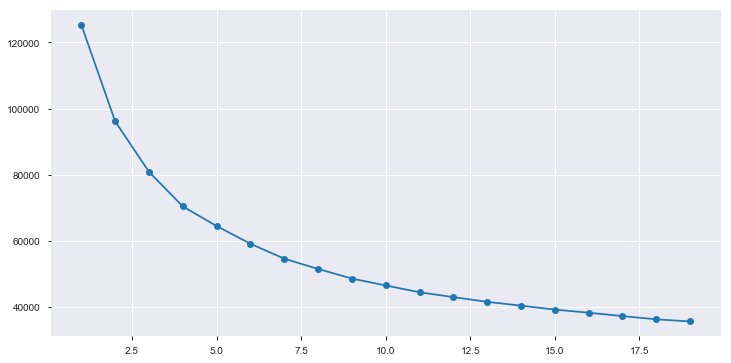

In [106]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Note:

The elbow diagram shows that the gain in explained variance reduces significantly from to 4 to 5 to 6. So, optimal number of clusters could either 4 or 5. The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.